# Introduction to Quantum Computing with Python and Qiskit
<img src="Pictures/Meduim Images/August Articles/qc.jpg">

---
# About Me
---

Sara Ayman Metwalli  
I am 28 years old from Egypt  
Bachelor Degree in Communications and Electronics Engineering in 2014 and Masters Degree in Computer and Communications Engineering from Tokyo Institute of Technology in 2018.  

Now, I work with AQUA (Advancing QUantum Architecture) group in Keio University as a researcher.
<img src="Pictures/AQUA.png">

For more information about me: https://sara-ayman-metwalli.jimdosite.com  
For more information about AQUA: http://aqua.sfc.wide.ad.jp/home.html

----
# What is "Quantum Computing"?
----------
Quantum computing is the use of quantum-mechanical phenomena such as superposition and entanglement to perform computation.


What is entanglement? and what does superposition mean?


To explain these important concepts, we first need to understand what is a "Qubit"

<img src="Pictures/thinking_man.jpg">

## Superposition
---
<img src="Pictures/Meduim Images/August Articles/cat.png">

Superposition may be the most famous quantum mechanics term ever! I guarantee you have heard of it before, not directly perhaps, but as the infamous Schrodinger’s Cat.

Assume you have a cat and a sealed bottle of poison in a closed box together. The question now is, how would you know if the poison bottle broke open and the cat died or if the cat is still alive inside the box?

The cat state remains a mystery, that is until we finally open the box. Once we do that, the superposition will collapse, and the cat will be either 100% dead or 100% alive.

## Qubits
---
<img src="Pictures/Meduim Images/August Articles/qubit.jpeg">

Qubits are the basic unit of data in quantum computing, and it’s the equivalent of bits in classical computing. Any bit can have a value of 0 or 1, so does qubits, to differentiate between them, we use something called the Dirac Style (kit notation) to represent qubits. Instead of 0, 1, we write |0⟩ and |1⟩ and we read that as “zero state,” or “one state.”

## Entanglement
---
Entanglement is a physical phenomenon that refers to the relation between two or more particles — or, to generalize it, qubits — that affect their properties such that we can not describe the state of one of them independently of the others. 

One of the most commonly used qubits is photon spins. A photon can either have spin up (one state) or spin down (zero states). If we have two entangled photons, then they must have opposite spins, if one is up then the other must be down.

<img src="Pictures/Meduim Images/August Articles/int.png">


# Existing Tools for QC
---
|Name            |Type               |Site                                                                                        |Year Released      |Company                                         |Language                           |Info                                               |Extra Links                                             |Pros                                                   |Cons                                  |
|----------------|-------------------|--------------------------------------------------------------------------------------------|-------------------|------------------------------------------------|-----------------------------------|---------------------------------------------------|--------------------------------------------------------|-------------------------------------------------------|--------------------------------------|
|Qiskit          |Programming-based  |https://qiskit.org/                                                                         |2017               |IBM                                             |Python                             |Most popular tool                                  |https://github.com/Qiskit/qiskit                        |Allows users to execute their codes on actual devices  |Installing is a hastle                |
|QuTIP           |Programming-based  |http://qutip.org/                                                                           |2012               |J. R. Johansson, P. D. Nation, and F. Nori      |Python                             |Very similar to Qiskit (syntax-wise)               |https://github.com/qutip                                |                                                       |Only simulation                       |
|Q#              |Programming-based  |https://docs.microsoft.com/en-us/quantum/overview/what-is-qsharp-and-qdk?view=qsharp-preview|2017               |Microsoft                                       |New open-source                    |Q# draws familiar elements from Python, C#, and F# |https://github.com/Microsoft/Quantum                    |                                                       |Only simulation                       |
|Cirq            |Programming-based  |https://github.com/quantumlib/Cirq                                                          |2018               |Google (but not an official product)            |Python                             |                                                   |https://cirq.readthedocs.io/en/stable/index.html        |                                                       |Only simulation                       |
|Ocean SDK       |Programming-based  |https://docs.ocean.dwavesys.com/en/latest/index.html                                        |N/A                |D:Wave                                          |Python                             |Terminal-style                                     |https://github.com/dwavesystems/dwave-ocean-sdk         |                                                       |Only simulation                       |
|Pyquil          |Programming-based  |https://github.com/rigetti/pyquil                                                           |2018               |Rigetti                                         |Python                             |                                                   |https://github.com/rigetti/quilc                        |                                                       |Only simulation                       |
|Q.js            |Drag and Drop      |https://stewdio.github.io/q.js/index.html                                                   |N/A (probably 2020)|Stewart Smith                                   |JavaScript                         |Python-inspired No installation needed (browser)   |https://github.com/stewdio/q.js                         |No installation needed                                 |Requires quantum gates-level knowledge|
|Quirk           |Drag and Drop      |https://algassert.com/quirk                                                                 |2016               |Craig Gidney                                    |JavaScript                         |Browser                                            |https://github.com/Strilanc/Quirk                       |No installation needed                                 |Requires quantum gates-level knowledge|
|QUI             |Drag and Drop      |https://qui.research.unimelb.edu.au/#tab13                                                  |2018               |Hollenberg Group at the University of Melbourne.|?                                  |Browser                                            |https://qui.research.unimelb.edu.au/#tab5               |No installation needed                                 |Requires quantum gates-level knowledge|
|Scaffold/ScaffCC|Programming-based  |https://github.com/epiqc/ScaffCC                                                            |2012               |                                                |C/C++/Verilog                      |                                                   |https://www.cs.princeton.edu/research/techreps/TR-934-12|Support behavioral-like synatx of quantum agtes        |                                      |
|Qrack           |Programming-based  |https://vm6502q.readthedocs.io/en/latest/                                                   |2017               |Daniel Strano                                   |C++                                |                                                   |                                                        |Has support of Qiskit                                  |                                      |
|QX Simulator    |QASM-based         |http://quantum-studio.net/#quick_start                                                      |                   |QuTech by Nader Khammassi                       |QASM                               |                                                   |                                                        |                                                       |low-level quantum assembly language   |
|Q-kit           |Drag and Drop (GUI)|https://sites.google.com/view/quantum-kit/home                                              |2018               |                                                |QASM-like command line instructions|                                                   |                                                        |Can use Python to genrate command line instructions    |                                      |
|Silq            |Programming-based  |https://silq.ethz.ch/documentation                                                          |2020               |ETH Zürich                                      |New open-source                    |                                                   |https://github.com/eth-sri/silq                         |Uses higher level implementation rather than gate level|                                      |
|Quipper         |Programming-based  |https://www.mathstat.dal.ca/~selinger/quipper/  

# Coding Time
---

How can we represent qubits in code?

Use the Python *Qiskit* Module.

In [ ]:
!pip install qiskit
!pip install matplotlib

In [6]:
#Codes in this notebook are inspired by Quantum Inspire Website
#This code is written by: Sara A. Metwalli for the Woman Who Code Python chapter

#Libraries needed to implement and simulate quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute 
#Custem functions to simplify answers
import Our_Qiskit_Functions as oq #a part of the libabry presented in arXiv:1903.04359v1.


#Initialize backends simulators to visualize circuits
S_simulator = Aer.backends(name='statevector_simulator')[0]
Q_simulator = Aer.backends(name='qasm_simulator')[0]

#Create quantum registers (to hold qubits)
q = QuantumRegister(2)
#Classical register to hold classical bits (Used to measure results)
c = ClassicalRegister(2)
#Create a quantum circuit using the above registers
qc = QuantumCircuit(q,c)

# Quantum Gates
---

Programing quantum computers is now done on a gate level, similar to classical gates.

Now

Let's talk about most common quantum gates

## Identity Operator
---

The Identity gate (has a symbol I) is a single qubit gate that leaves the state of the qubit unchanged. 

<img src="Pictures/Meduim Images/July Articles/the-I-gate.gif">



C:\Users\ayman\AppData\Roaming\Python\Python37\site-packages\qiskit\util.py:109: DeprecationWarning: The QuantumCircuit.iden() method is deprecated as of 0.14.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.i() method instead.
  return func(*args, **kwargs)


1.0  |00>   
1.0  |00>   


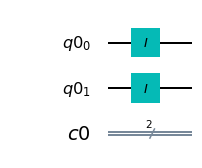

In [3]:
#1- Iden operator
qc.iden(q[1])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

## NOT Gate
---

The NOT gate takes a qubits and flips its state!

<img src="Pictures/Meduim Images/July Articles/the-not-gate.gif">

1.0  |10>   
1.0  |10>   


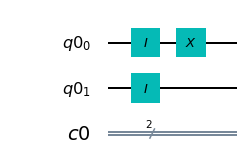

In [4]:
#2- NOT gate
qc.x(q[0])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

## Controlled-NOT Gate (Toffoli Gate)
---

The controlled-NOT is a 2-qubit gate that uses one qubit to control the state of the other.

<img src="Pictures/Meduim Images/July Articles/the-cnot-gate.gif">

1.0  |11>   
1.0  |11>   


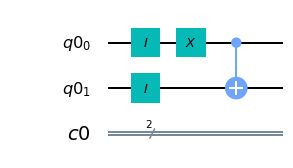

In [5]:
#3- Controlled-NOT
qc.cx(q[0],q[1])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

## The Hadamard Gate
---

The Hadamard gate (H) is the magic gate. It is the gate responsible for creating the superposition of states. This gate puts the qubit in 50/50 superposition of states |0⟩ and |1⟩ despite whether the input state was |0⟩ or|1⟩.

<img src="Pictures/Meduim Images/July Articles/the-h-gate.gif">

0.70711  |00>   -0.70711  |10>   
0.70711  |00>   -0.70711  |10>   


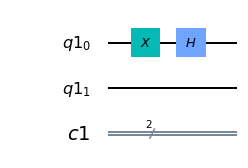

In [10]:
qc = QuantumCircuit(q,c)
#4- Hadamard
qc.x(q[0])
qc.h(q[0])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

# Quantum basis
---

|0> base is the zero state  
|1> base is the one state  
|+> base is the Hadamard of the |0> state  
|-> base is the Hadamard of the |1> state  


<img src="Pictures/Meduim Images/July Articles/Quantum Simulators/5.png">

# Quantum Circuit Simulators
---

Quantum circuit simulators are special tools that allow you to build and simulate quantum circuits without needing to write any code or perform any mathematical tricks.

<a href="https://quantum-computing.ibm.com/composer">IBMQ Experience</a>: IBM offers a drag-and-drop circuit composer that allows you to build your circuits and see the results.

# Our First Quantum Circuit
---
Assume we want to create a circuit that flips the last qubit of any given state only if it was 1. For example, the state |1011⟩ would become |1010⟩ because the last bit was 1. However, if the input state is |1100⟩, the circuit won’t make any changes and will return the same state. How can I achieve that?

Initially, all qubits are set to the |0⟩ state, so we need to create the starting state, ex, state |1011⟩ first, and then apply some gates to flip the last digit of that state.
Before we start, the way states are usually read is from right to left, which in the composer goes from top to bottom.

<img src="Pictures/Meduim Images/July Articles/state.png">



## Using the simulator
---

### Steps to solving the problem
Step 1: Create the starting|1011⟩ state
Flip the last qubit.

<img src="Pictures/snip.png">

## Using code
---

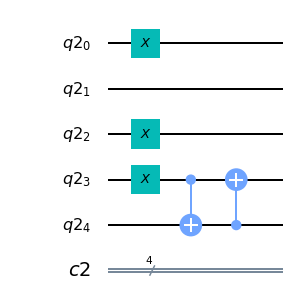

In [11]:
#Create the circuit and add tha gates
q = QuantumRegister(5)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.x(q[2])
qc.x(q[3])
qc.cx(q[3],q[4])
qc.cx(q[4],q[3])
qc.draw(output = "mpl")

In [11]:
#Measure the answer 
from qiskit.tools.visualization import plot_histogram
qc.measure(q[:4],c)
oq.Measurement(qc,shots=1024) #Displays measurement in ket-notation 

'1024|1010>   '

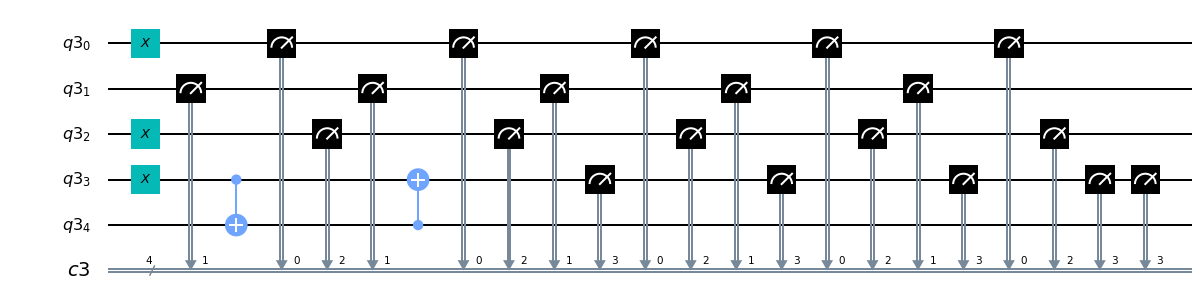

In [12]:
qc.draw(output = "mpl") #Final circuit

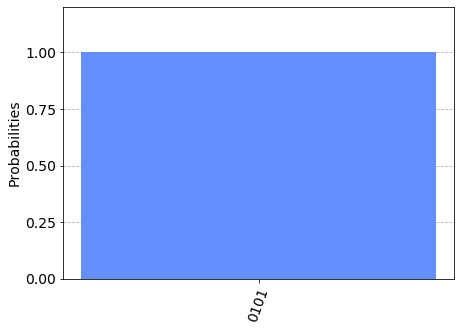

In [13]:
#Execute the circuit
ex = execute(qc, Q_simulator, shots = 1024)
res = ex.result()
M = res.get_counts(qc)

#Plot the results
plot_histogram(M, bar_labels=False)